## Business understanding

Telecommunication market is expanding day by day. Companies are facing a severe loss of revenue due to increasing competition hence the loss of customers. They are trying to find the reasons of losing customers by measuring customer loyalty to regain the lost customers. The customers leaving the current company and moving to another telecom company are called churn

## Objectives

1.How to reduce churn and increase retention by predicting high-risk customers and what makes them churn?

2.How can i optimize model performance with the right balance between precision and recall?

3.Building models that Minimize false positives.

4.How class imbalance can be handled to ensure accurate predictions for churners? 

5.Develop targeted campaigns based on the model's predictions.

## Data understanding

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [53]:
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')


In [54]:
df.tail(10)


state  account length  area code phone number international plan  \
3323    IN             117        415     362-5899                 no   
3324    WV             159        415     377-1164                 no   
3325    OH              78        408     368-8555                 no   
3326    OH              96        415     347-6812                 no   
3327    SC              79        415     348-3830                 no   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3323              no                      0              118.4   
3324              no                      0              169.8   
3325              no                      0              193.4   
3326              no                      0              106.6   
3327              no                      0              134.7   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3323              126             20.13  ...               97   
3324              114             28.87  ...              105   
3325               99             32.88  ...               88   
3326              128             18.12  ...               87   
3327               98             22.90  ...               68   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3323             21.19                227.0                 56   
3324             16.80                193.7                 82   
3325              9.94                243.3                109   
3326             24.21                178.9                 92   
3327             16.12                221.4                128   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3323               10.22                13.6                 3   
3324                8.72                11.6                 4   
3325               10.95                 9.3                 4   
3326                8.05                14.9                 7   
3327                9.96                11.8                 5   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3323               3.67                       5   True  
3324               3.13                       1  False  
3325               2.51                       2  False  
3326               4.02                       1  False  
3327               

In [55]:
df.head(10)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   
6    MA             121        510     355-9993                 no   
7    MO             147        415     329-9001                yes   
8    LA             117        408     335-4719                 no   
9    WV             141        415     330-8173                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   
5              no                      0              223.4               98   
6             yes                     24              218.2               88   
7              no                      0              157.0               79   
8              no                      0              184.5               97   
9             yes                     37              258.6               84   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   
5             37.98  ...              101             18.75   
6             37.09  ...              108             29.62   
7             26.69  ...               94              8.76   
8             31.37  ...               80             29.89   
9             43.96  ...              111             18.87   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6           

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

i am trying to understand the data if some coulmm have unique values so as to trasform them to categorical datatype

In [57]:
df["state"].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [58]:
df["international plan"].unique()

array(['no', 'yes'], dtype=object)

In [59]:
df["voice mail plan"].unique()

array(['yes', 'no'], dtype=object)

In [60]:
df["churn"].unique()


array([False,  True])

so after checking the data, i want to change the state, voice mail plan and international plan and churn to categorical datadype. later depending on the model i might change them to one-hot encoder.

### coverting data type

In [61]:
df1=df
df1['state'] = df1['state'].astype('category')
df1['international plan'] = df1['international plan'].astype('category')
df1['voice mail plan'] = df1['voice mail plan'].astype('category')
df1['churn'] = df1['churn'].map({True: 'Yes', False: 'No'})
df1['churn'] = pd.Categorical(df1['churn'])


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   category
 1   account length          3333 non-null   int64   
 2   area code               3333 non-null   int64   
 3   phone number            3333 non-null   object  
 4   international plan      3333 non-null   category
 5   voice mail plan         3333 non-null   category
 6   number vmail messages   3333 non-null   int64   
 7   total day minutes       3333 non-null   float64 
 8   total day calls         3333 non-null   int64   
 9   total day charge        3333 non-null   float64 
 10  total eve minutes       3333 non-null   float64 
 11  total eve calls         3333 non-null   int64   
 12  total eve charge        3333 non-null   float64 
 13  total night minutes     3333 non-null   float64 
 14  total night calls       

##　Data cleaning

### handling missing value

In [63]:
df1.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [64]:
### checking duplicates

In [65]:
df1[df1.duplicated()].count()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [66]:
# dropping column whuich is deemed useless
df1= df1.drop('phone number', axis=1)


In [67]:
### checking outliers

<Axes: >

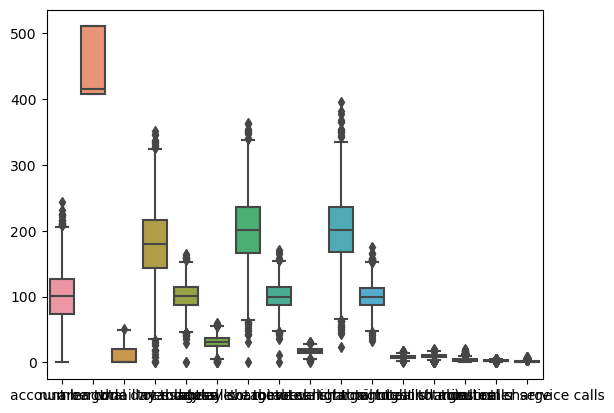

In [68]:
sns.boxplot(df1)

i have outliers but are not very extreme, hence i am going to keep them

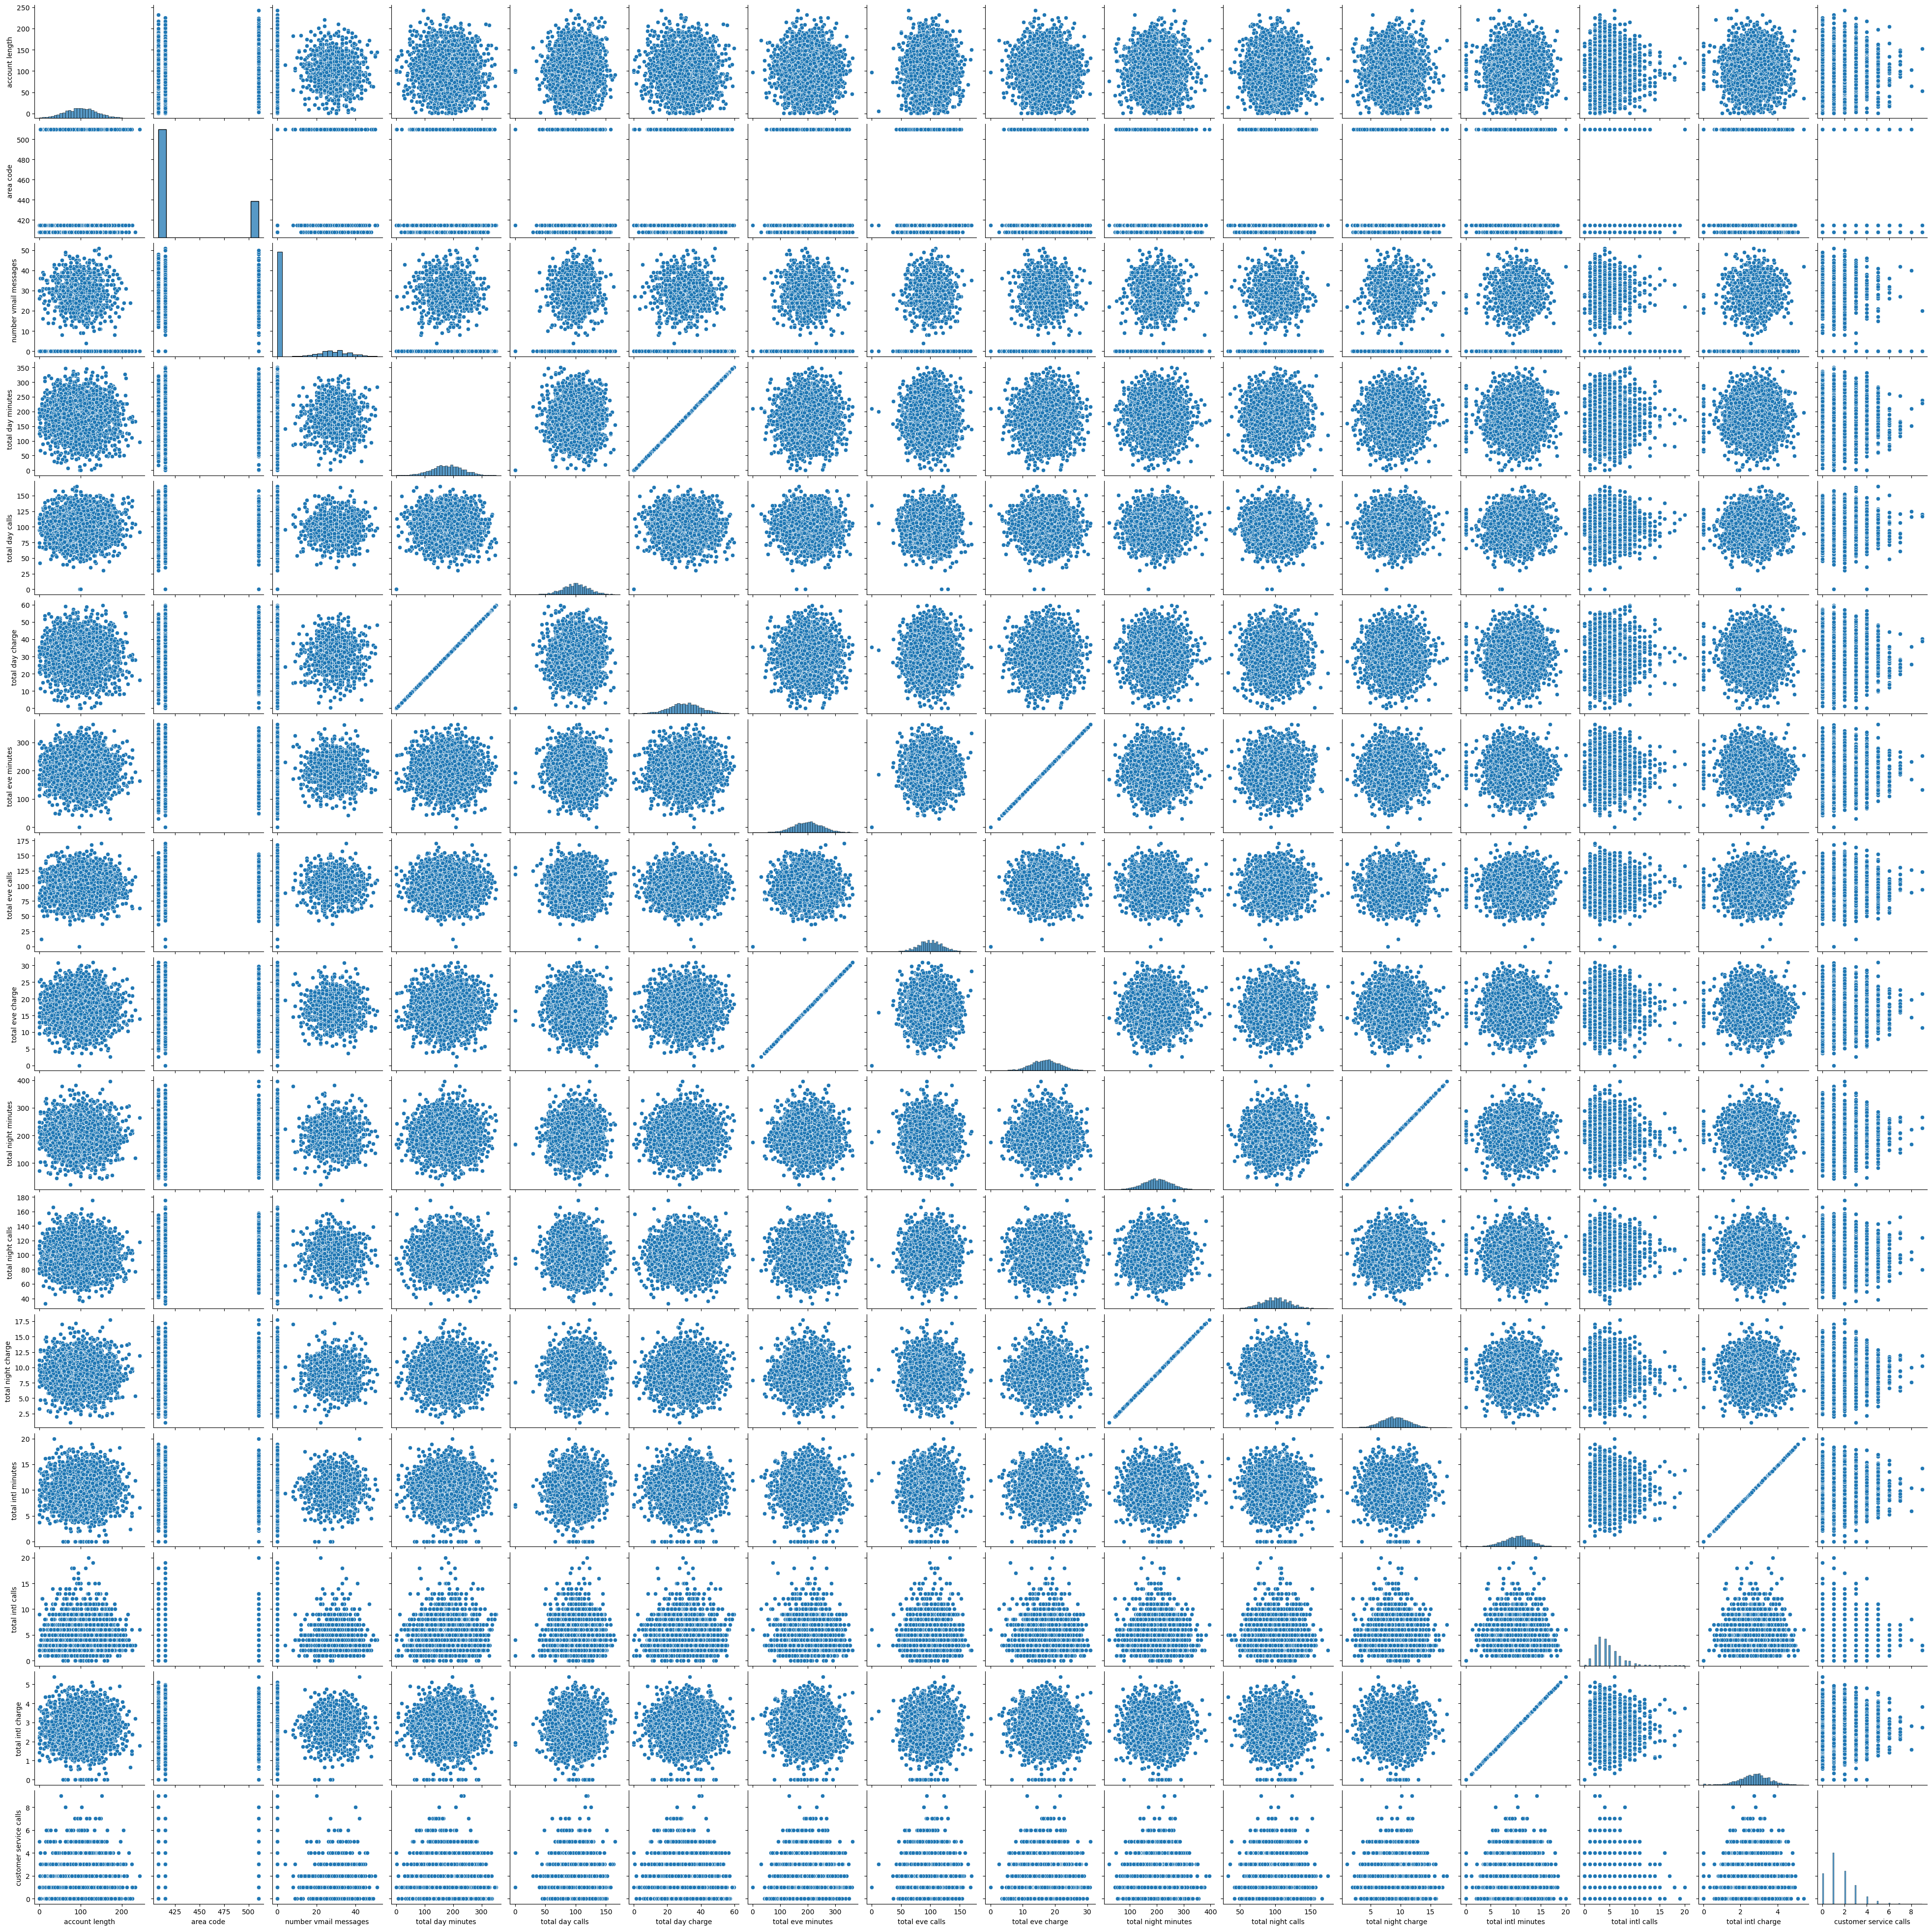

In [69]:
sns.pairplot(df1)

### computing the correlation between numerical columns

                        account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl m

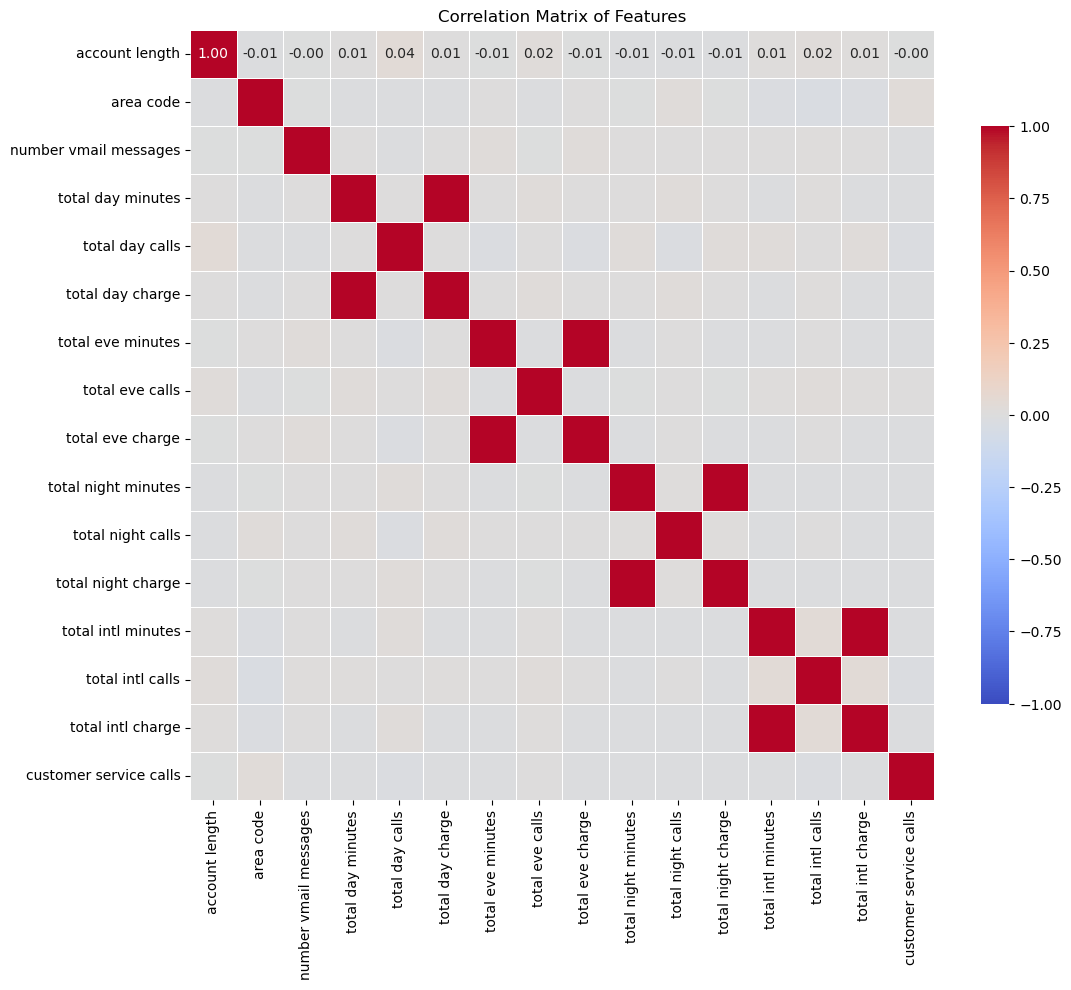

In [96]:
correlation_matrix = df1.select_dtypes(include=['number']).corr()

# the correlation matrix
print(correlation_matrix)

# correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.75})

plt.title('Correlation Matrix of Features')
plt.show()

it can be seen that the minutes for whatever type of call the respective charges gave a 1 to 1 relationships. which this might indicate that a model that support linear relationship can be used.

### plotting of data

this plot shows the churn count by each state

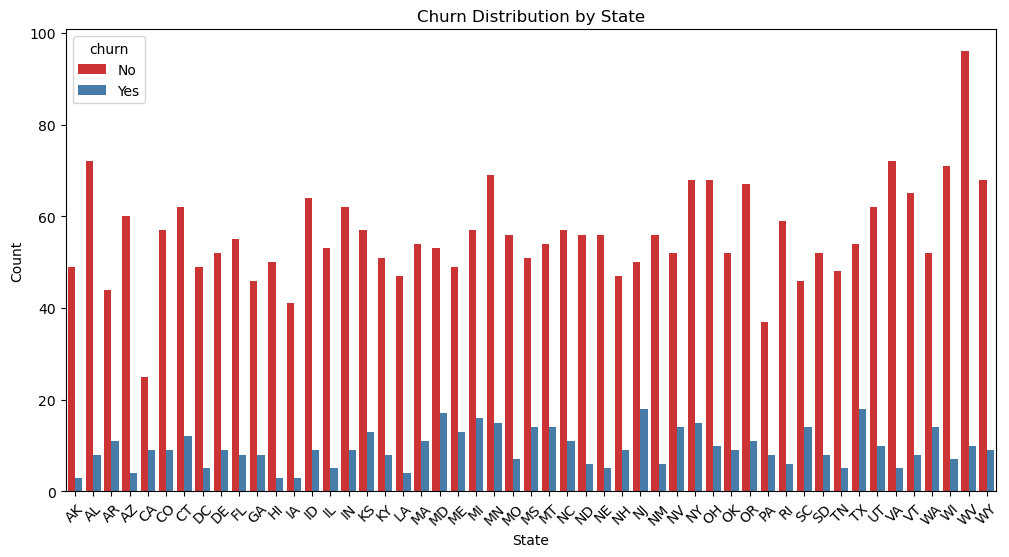

In [70]:
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='churn', data=df1, palette='Set1')
plt.title('Churn Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

it can be seen that  WV has the highest false churn in terms of counts, but this value in only absolute, so make a comparisone there is a need to have a relative count in relation to other states. To address this, you should consider normalizing the data to show the proportion of churn within each state (both for True and False churn) so you can better compare states of different sizes.To address this, you should consider normalizing the data to show the proportion of churn within each state (both for True and False churn) so you can better compare states of different sizes.To address this, you should consider normalizing the data to show the proportion of churn within each state (both for True and False churn) so you can better compare states of different sizes.To address this each state is normaziled within each state, so that the proportions.

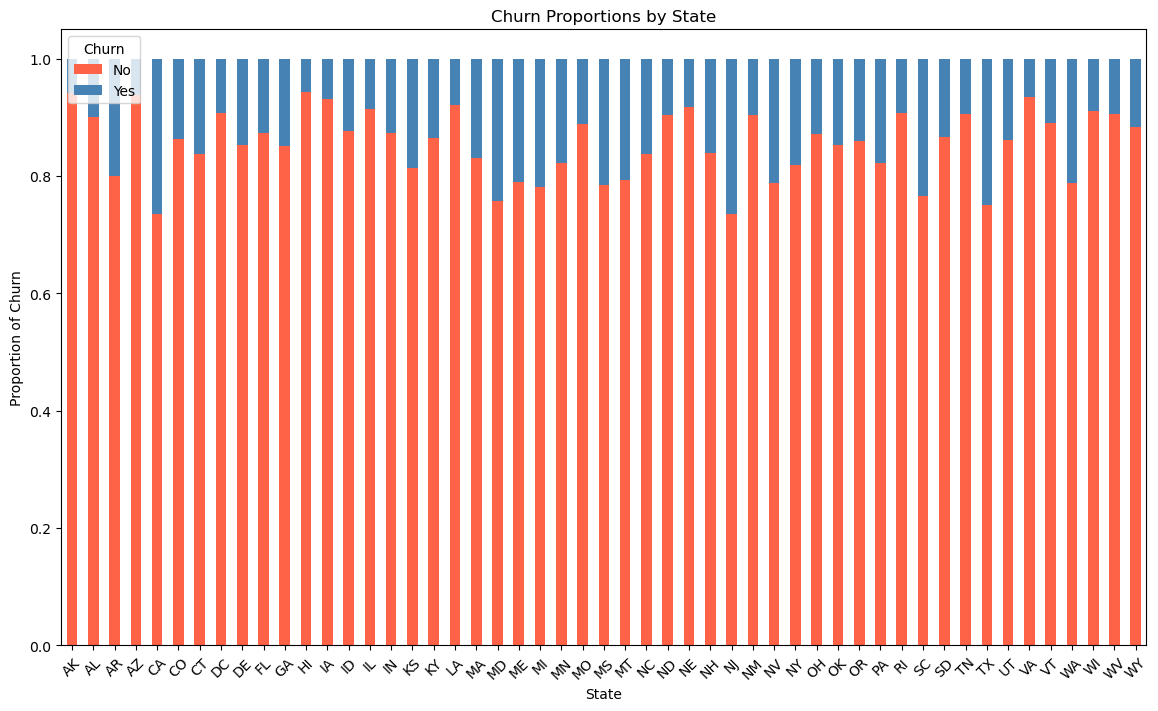

In [71]:
# Calculate churn proportions per state
churn_state_counts = df1.groupby(['state', 'churn']).size().unstack()

# Normalize by dividing by the total count of each state
churn_state_proportions = churn_state_counts.div(churn_state_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot of churn proportions by state
churn_state_proportions.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#FF6347', '#4682B4'])
plt.title('Churn Proportions by State')
plt.xlabel('State')
plt.ylabel('Proportion of Churn')
plt.xticks(rotation=45)  
plt.legend(title='Churn', loc='upper left',labels=['No', 'Yes'])
plt.show()

it can be concluded that some states like NJ and CA have the highest churn

this plot explores the relationship between international calls and churn

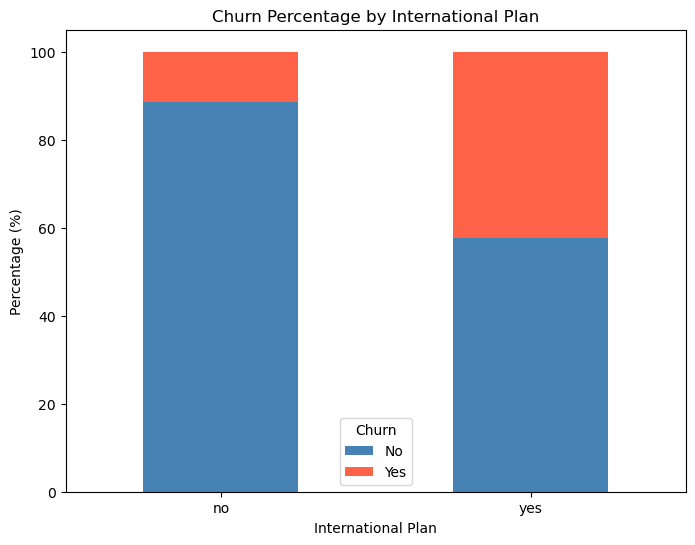

In [72]:
counts = df.groupby(['international plan', 'churn']).size().unstack()
# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
# stacked bar chart
percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#4682B4', '#FF6347'])
# Title and labels
plt.title('Churn Percentage by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

it can be concluded that people that have international calls tend to churn more  than the people who don`t have.

this plot shows the churn in relation to people having voice mail plan

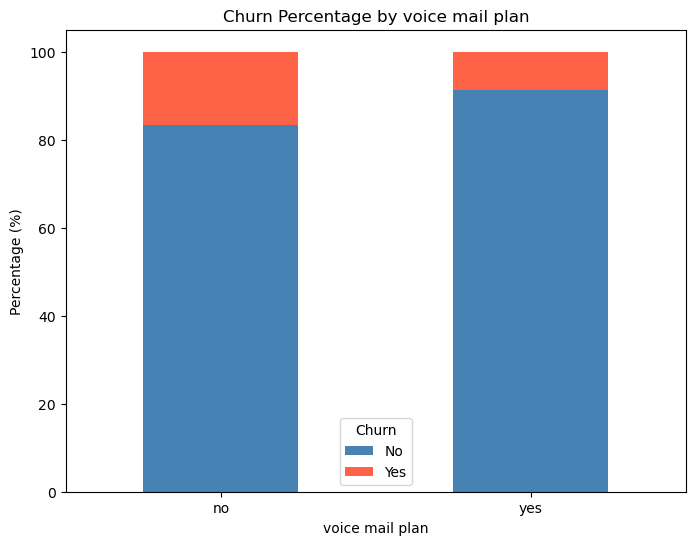

In [73]:
counts = df.groupby(['voice mail plan', 'churn']).size().unstack()
# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
# stacked bar chart
percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#4682B4', '#FF6347'])
# Title and labels
plt.title('Churn Percentage by voice mail plan')
plt.xlabel('voice mail plan')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

it can be concluded that people that don`t have voice mail plan tend to churn more.

this plot is total day minutes against day charge and colored by churn

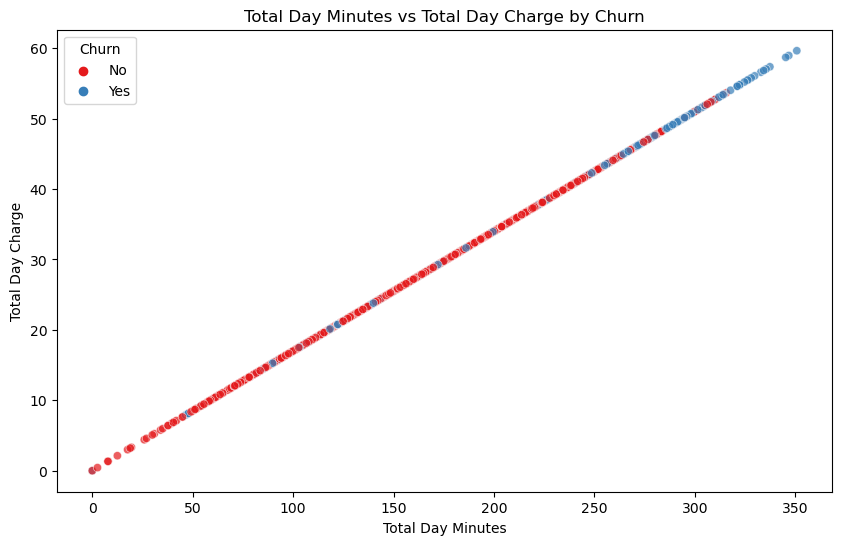

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df1,
    x='total day minutes',
    y='total day charge',
    hue='churn',
    palette='Set1',
    alpha=0.7
)

plt.title('Total Day Minutes vs Total Day Charge by Churn')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Charge')
plt.legend(title='Churn')
plt.show()

it can be concluded that the relationship is 1 to 1, and as the charges or minutes are high the people tend to churn more.

this plot is total eve minutes agains eve charge and coloured by churn

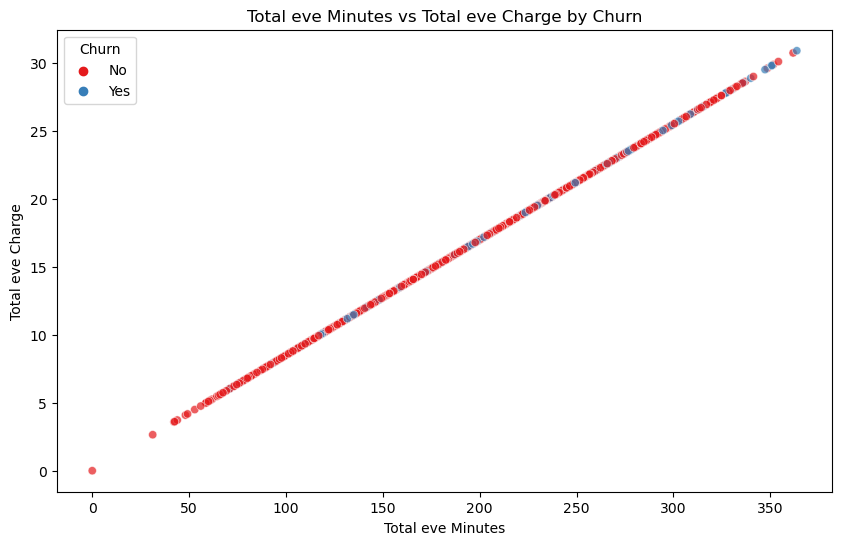

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df1,
    x='total eve minutes',
    y='total eve charge',
    hue='churn',
    palette='Set1',
    alpha=0.7
)

plt.title('Total eve Minutes vs Total eve Charge by Churn')
plt.xlabel('Total eve Minutes')
plt.ylabel('Total eve Charge')
plt.legend(title='Churn')
plt.show()

it can be concluded that the relationship is 1 to 1, but there is no particular relationship with churn

this plot is total night minutes agains night charge and coloured by churn

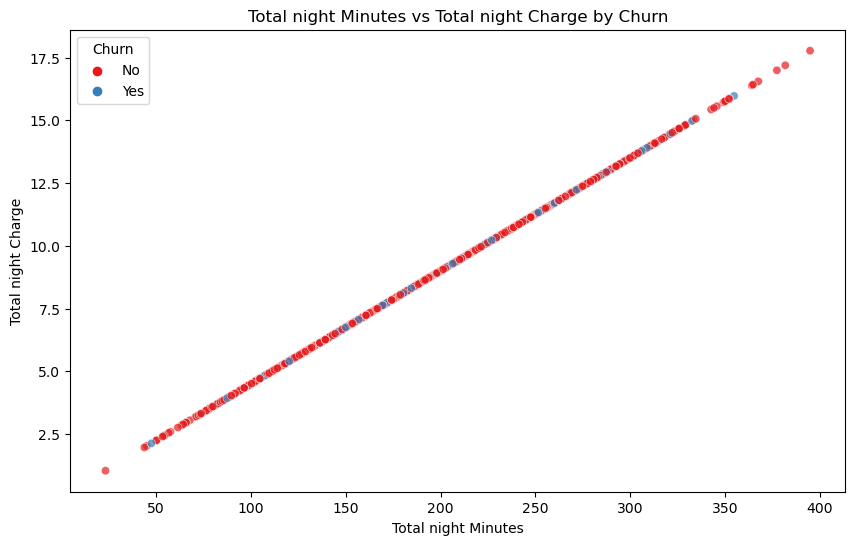

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df1,
    x='total night minutes',
    y='total night charge',
    hue='churn',
    palette='Set1',
    alpha=0.7
)

plt.title('Total night Minutes vs Total night Charge by Churn')
plt.xlabel('Total night Minutes')
plt.ylabel('Total night Charge')
plt.legend(title='Churn')
plt.show()

it can be concluded that the relationship is 1 to 1, but there is no particular relationship with churn


## Data Preprocessing

In [77]:
#library
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# seperating the categorical form numerical features except for the target variable
numerical_features = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df1.select_dtypes(include=['category']).columns.tolist()
target_column = 'churn'
categorical_features.remove(target_column)
#standardizing the numerical features and apply onehot encoder on the categorical variables
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(drop='first'), categorical_features)])

## Modelling using pipeline

### logistic regression 

In [78]:
#importing of libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, auc

In [79]:
# Full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression())])

In [80]:
# definig x and y and then applying fit
X = df1.drop('churn', axis=1)
y = df1['churn'].map({'No': 0, 'Yes': 1}) 
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['account length',
                                                   'area code',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge',
                                                   'customer service calls']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['state',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('classifier', LogisticRegression())])

In [81]:
#splitting the data into train and test , with 0.2 test data and keeps the same churn ratio in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:
#fitting
pipeline.fit(X_train, y_train)
#predicting
y_pred = pipeline.predict(X_test)
#confusion matrix
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
#crossvalidation scores
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

[[549  21]
 [ 72  25]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.54      0.26      0.35        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.64       667
weighted avg       0.83      0.86      0.84       667

Cross-validation accuracy scores: [0.85307346 0.85607196 0.86056972 0.86336336 0.86336336]
Mean accuracy: 0.8592883738311026


the model has an accuracy of 86% and a recall of 99% for no churn and a 26% for yes churn

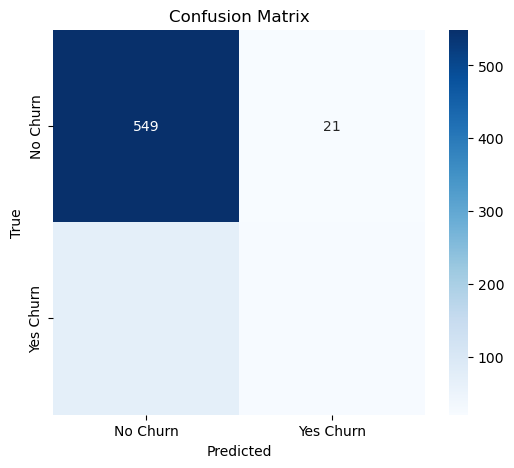

In [83]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Yes Churn'], yticklabels=['No Churn', 'Yes Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC-ROC Score: 0.8092060047024778


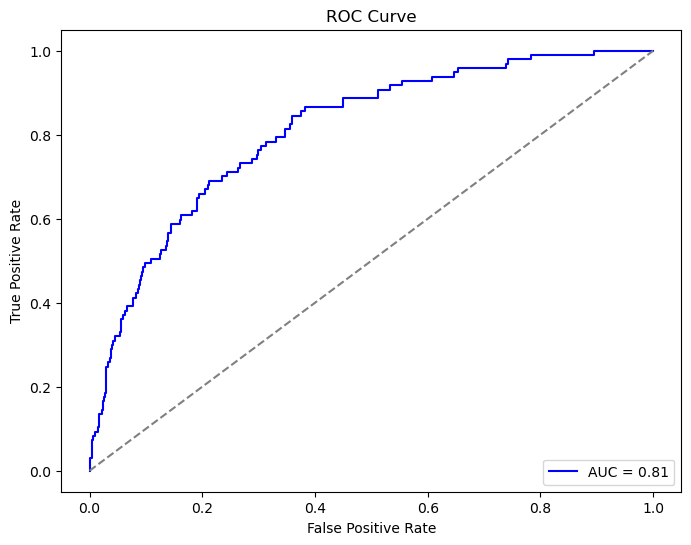

In [84]:
y_prob = pipeline.predict_proba(X_test)[:, 1]
# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_score)
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [85]:
# Get model coefficients
coefficients = pipeline.named_steps['classifier'].coef_[0]
# Print coefficients
for feature, coef in zip(X_train.columns, coefficients):
    print(f'{feature}: {coef}')

state: 0.038833625647567295
account length: -0.03157745768543498
area code: 0.34943081769463286
international plan: 0.3324505906537912
voice mail plan: 0.09105270144168924
number vmail messages: 0.33343549696565206
total day minutes: 0.19796276327637982
total day calls: 0.04982795819560248
total day charge: 0.19827065372629663
total eve minutes: 0.06001054424572813
total eve calls: -0.0023587409624517813
total eve charge: 0.07413875845994657
total night minutes: 0.10378678691796299
total night calls: -0.21182329849498716
total night charge: 0.1350395587546658
total intl minutes: 0.7535071759927707
total intl calls: -0.48975727317473905
total intl charge: -0.03372248673020865
customer service calls: -0.3861077146528432


it can be seen from the coefficients that total intl minutes has the highest positive impact on the prediction, total evening calls have almost close to zero effect and total intl calls have the highest negative impacts

### SVM

In [86]:
# importing lybrary
from sklearn.svm import SVC

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       570
           1       0.82      0.38      0.52        97

    accuracy                           0.90       667
   macro avg       0.86      0.68      0.73       667
weighted avg       0.89      0.90      0.88       667

AUC-ROC Score: 0.880774100198951


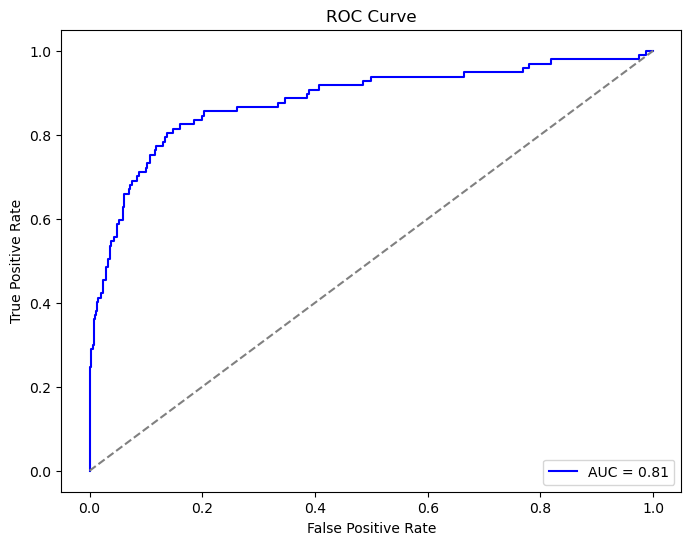

Confusion Matrix:
 [[562   8]
 [ 60  37]]


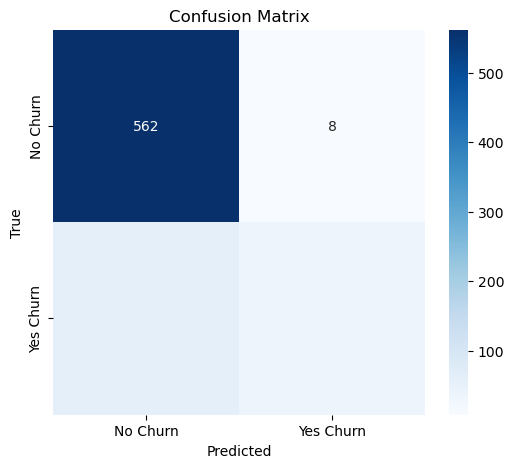

In [87]:
svm_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', SVC(random_state=42, probability=True))])
# Train the SVM model
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm_model.predict(X_test)
# Evaluate the model using classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Calculate and print the AUC-ROC score
y_prob = svm_model.predict_proba(X_test)[:, 1] 
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
#Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Yes Churn'], yticklabels=['No Churn', 'Yes Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

the accuracy is 90% and the recall of no churn is 99% while for yes churn is 38% 

### KNN

In [88]:
#importing library
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.8846
Confusion Matrix:
 [[564   6]
 [ 71  26]]


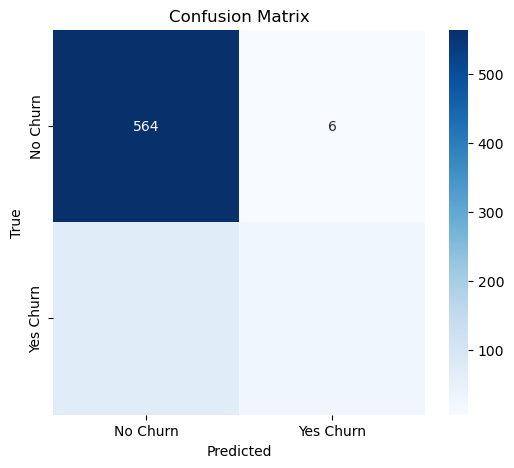

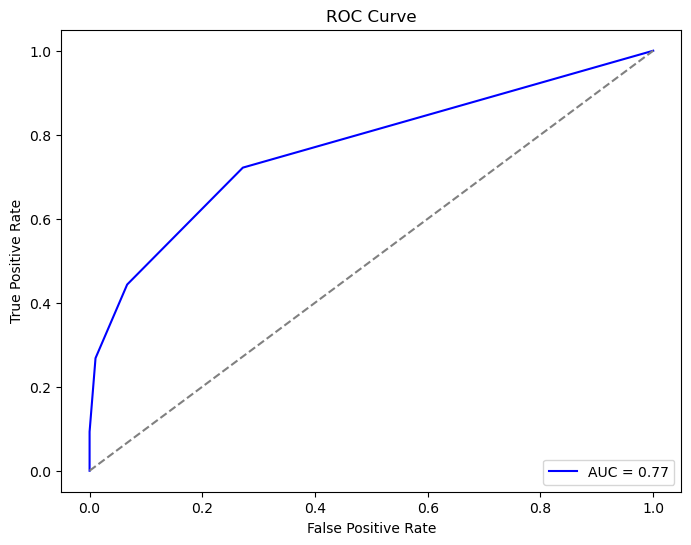

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       570
           1       0.81      0.27      0.40        97

    accuracy                           0.88       667
   macro avg       0.85      0.63      0.67       667
weighted avg       0.88      0.88      0.86       667



In [89]:
#  the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', knn_model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Yes Churn'], yticklabels=['No Churn', 'Yes Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_prob = pipeline.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)  

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

the accuracy is 88% and the recall of no church is 99% while for yes churn is 27% 

### Random Forest

In [90]:
# importing of library
from sklearn.ensemble import RandomForestClassifier

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       570
           1       0.91      0.52      0.66        97

    accuracy                           0.92       667
   macro avg       0.92      0.75      0.81       667
weighted avg       0.92      0.92      0.91       667

AUC-ROC Score: 0.8959757641526496


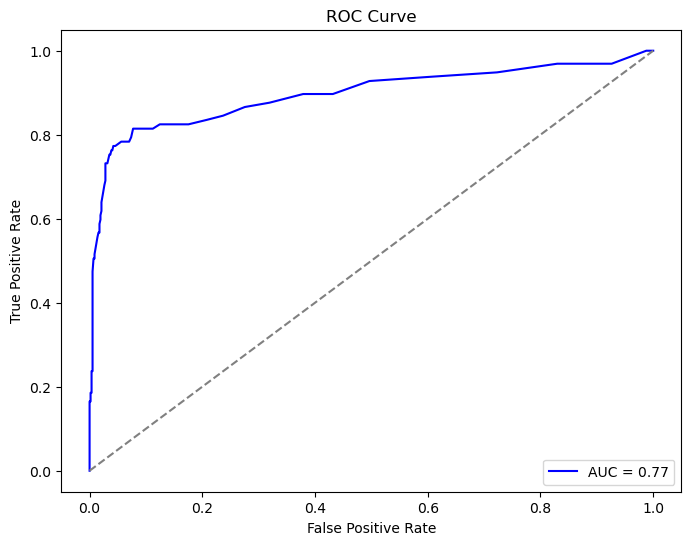

Confusion Matrix:
 [[565   5]
 [ 47  50]]


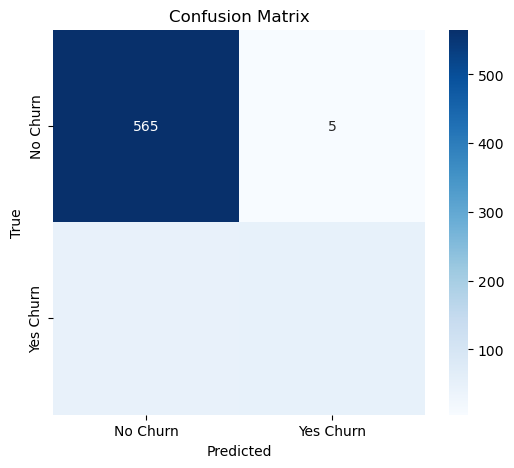

In [91]:
rf_model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))])
# Train the Random Forest model
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
# Evaluate the model using classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Calculate and print the AUC-ROC score
y_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Yes Churn'], yticklabels=['No Churn', 'Yes Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

the accuracy is 92% and the recall of no churn is 99% while for yes churn is 59% 

the best performing model is random forest with the accuracy is 92% and the recall of no church is 99% while for yes churn is 59%

to understand which features were important in the building of the random forest model, which is the better performing model the feature importance is computed

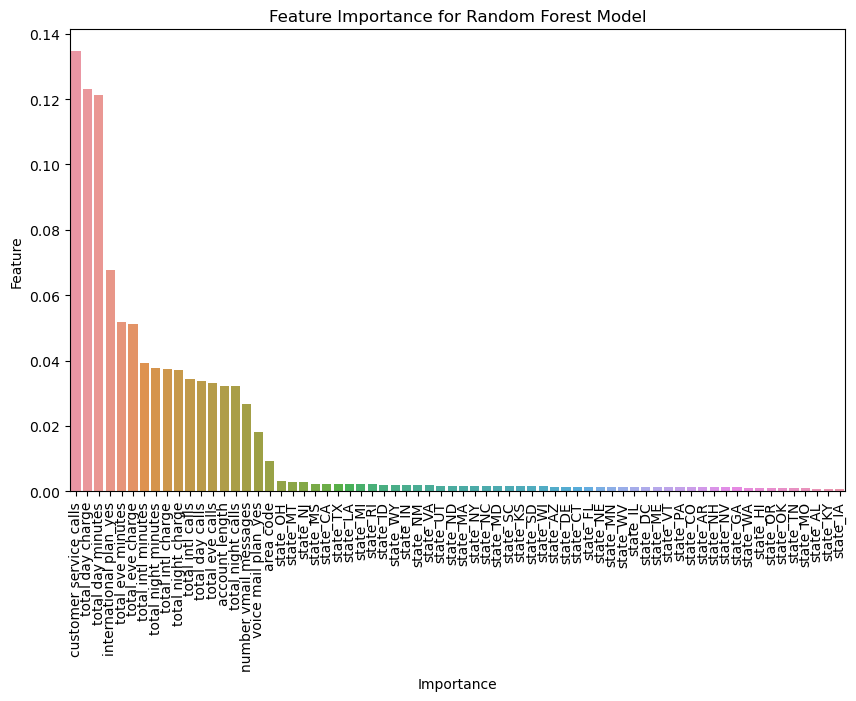

                   Feature  Importance
15  customer service calls    0.134600
5         total day charge    0.123191
3        total day minutes    0.121110
66  international plan_yes    0.067745
6        total eve minutes    0.051861
..                     ...         ...
57                state_TN    0.000947
39                state_MO    0.000885
16                state_AL    0.000868
32                state_KY    0.000709
27                state_IA    0.000630

[68 rows x 2 columns]


In [92]:
importances = rf_model.named_steps['classifier'].feature_importances_

# Get the numerical and categorical feature names
num_features = numerical_features
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

# Combine the numerical and one-hot encoded categorical feature names
all_feature_names = np.concatenate([num_features, cat_features])

# Create a DataFrame to display the feature importances with their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': all_feature_names,'Importance': importances})
# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot the top features by importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
plt.xticks(rotation=90)
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# print the feature importance table
print(feature_importance_df)

From the feature importance it can be seen that customer service calls, total day charge and  total day minutes have the most importance in estimating the churn.

### It can be seen that for all the models there is an imbalance in class, meaning that the entries for people who churn are very few to the people who don't churn. And my interest is in the people who churn to understand why they do it, and what factors are leading them to that.  To solve this imbalance i have decided a model which is good in handling class imbalance which is the CatBoost.

### CatBoost

In [93]:
#importing library
!pip install catboost
from catboost import CatBoostClassifier

0:	test: 0.7904865	best: 0.7904865 (0)	total: 57.6ms	remaining: 5.71s
99:	test: 0.8969976	best: 0.9011575 (68)	total: 4.93s	remaining: 0us

bestTest = 0.901157533
bestIteration = 68

Shrink model to first 69 iterations.


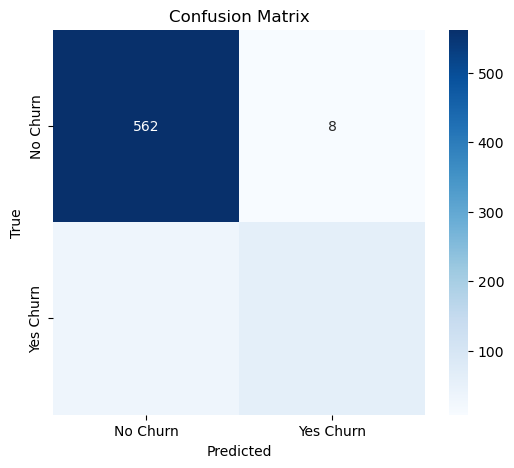

AUC-ROC Score: 0.9011575330077771


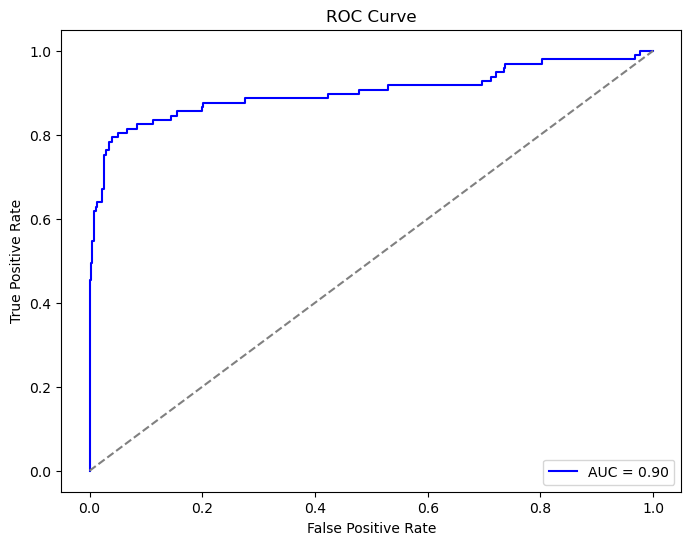

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       570
           1       0.89      0.64      0.74        97

    accuracy                           0.94       667
   macro avg       0.91      0.81      0.85       667
weighted avg       0.93      0.94      0.93       667



In [94]:
scaler = StandardScaler()
X_train_scaled_num = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]),columns=numerical_features,index=X_train.index)
X_test_scaled_num = pd.DataFrame(scaler.transform(X_test[numerical_features]),columns=numerical_features,index=X_test.index)

# Keep categorical features as they are no need for onehotencoder
X_train_cat = X_train[categorical_features].astype(str)
X_test_cat = X_test[categorical_features].astype(str)

# Combine scaled numerical and categorical features
X_train_final = pd.concat([X_train_scaled_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_scaled_num, X_test_cat], axis=1)

# Get list of categorical feature names after combining them
cat_features = categorical_features
# Define CatBoost model 100 iteration are considered
catboost_model = CatBoostClassifier(iterations=100,learning_rate=0.1,depth=6,eval_metric='AUC',random_state=42,verbose=100)
# Train model
catboost_model.fit(X_train_final, y_train,cat_features=cat_features,eval_set=(X_test_final, y_test),early_stopping_rounds=50)
# Predict
y_pred = catboost_model.predict(X_test_final)
y_prob = catboost_model.predict_proba(X_test_final)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Yes Churn'], yticklabels=['No Churn', 'Yes Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

it can be seen that the accuracy has improved to 94% and the recall for the 0 is 99% while for the 1 is 64%. 

This means that out of all the models this one performs best, because our interest is in the people who churn, and the recall for them is much improved in comparison to the other models.

this is the feature importance for the CatBoost

                   Feature  Importance
15  customer service calls   19.402913
3        total day minutes   15.401454
17      international plan   14.862018
5         total day charge   14.773028
13        total intl calls    6.674265
8         total eve charge    5.397455
2    number vmail messages    4.809905
6        total eve minutes    4.670053
12      total intl minutes    3.307359
18         voice mail plan    3.207915
14       total intl charge    2.715849
9      total night minutes    2.585217
10       total night calls    0.602902
4          total day calls    0.471257
11      total night charge    0.435061
7          total eve calls    0.296086
0           account length    0.219037
1                area code    0.168224
16                   state    0.000000


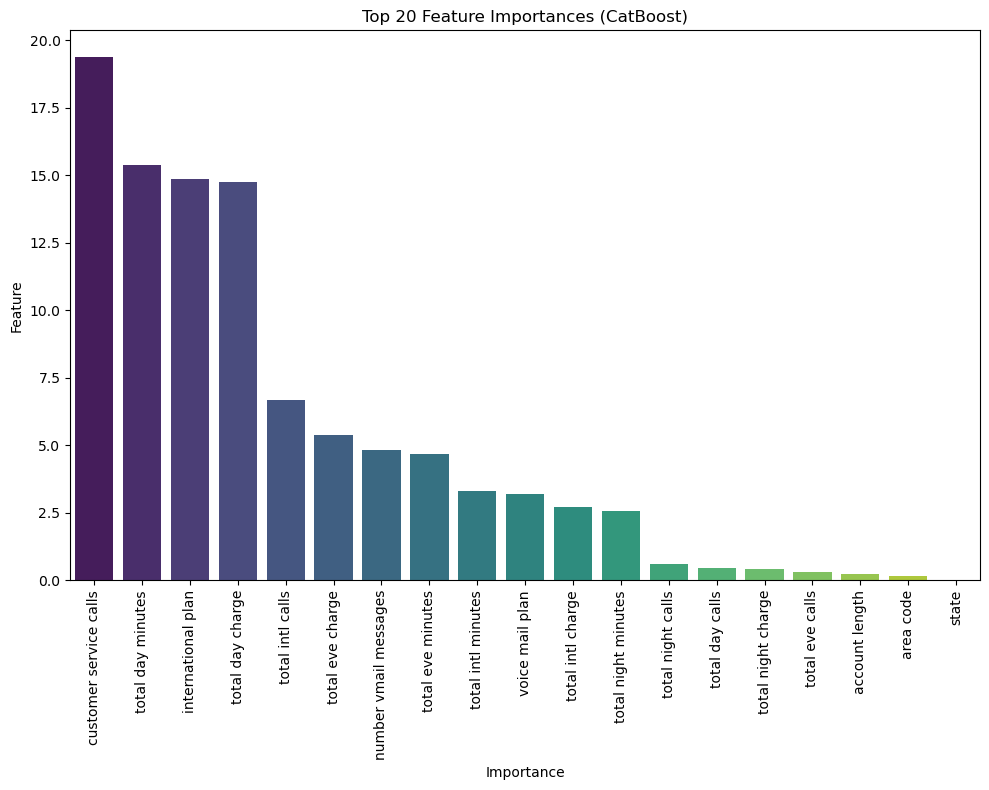

In [95]:
# Get feature importances
importances = catboost_model.get_feature_importance()
feature_names = X_train_final.columns

# Create a DataFrame for easy viewing
feat_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display top features
print(feat_importance_df.head(20))

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Feature', y='Importance', data=feat_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances (CatBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

the features that are important for the estimation are customer service calls, total day minutes, international plan and total day charge.

## Conclusion

1.Logistic regression,SVM model,KNN model,Random forest and CatBoost have been tried to predict churn,Random forest and Catboost are considered to be the most suitable models based on the accuracy:
  Random forest(the accuracy is 92% and the recall of no churn is 99% while for yes churn is 59%).
  CatBoost(the accuracy is 94% and the recall for the 0 is 99% while for the 1 is 64%).
They also handled class imbalance

2.Feature importance was done for this 2 models(Random forest and CatBoost)and the features with the highest importance for Random Forest was customer service calls,total day charge and total day minutes. For the CatBoost was customer service calls,total day minutes,international plan and total day charge.

3.While interpreting results of random forest and catboost, as it has been mentioned that some features are more important for the churn modelling. Which means that such features should be considered while dealing with at risk customer, by offering discounts or personalizing plan. Focusing on such features can be useful on devising the plan to reduce churn.